**Objective:**

The main objective of sports prediction is to improve team performance and enhance the chances of winning the game. The value of a win takes on different forms like trickles down to the fans filling the stadium seats, television contracts, fan store merchandise, parking, concessions, sponsorships, enrollment and retention.

**Environment and tools:**

Goggle Golab Notebook

Numpy

Pandas

Seaborn

Matplotlib

Scikit-learn

Web Scrapping by Using Beautifulsoup Python

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the page
url ='https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2023;type=year'
# Send a GET request to the URL

response=requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the data
table = soup.find('table', class_='engineTable')

# Create a CSV file to write the data
with open('cricket_data.csv', mode='w', newline='') as file:

    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header row to the CSV file
    header = [th.text.strip() for th in table.find('thead').find_all('th')]
    writer.writerow(header)

    # Write each row of data to the CSV file
    for tr in table.find('tbody').find_all('tr'):
        row = [td.text.strip() for td in tr.find_all('td')]
        writer.writerow(row)

print('Data saved to cricket_data.csv')

Importing all the libraries and dependencies.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
results = pd.read_csv('/content/Cricket_Project_dataset1.csv')

In [ ]:
results.head()

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Match_id
0,New Zealand,West Indies,New Zealand,159 runs,Queenstown,"Jan 1, 2014",ODI # 3451
1,New Zealand,West Indies,New Zealand,58 runs,Nelson,"Jan 4, 2014",ODI # 3452
2,New Zealand,West Indies,West Indies,203 runs,Hamilton,"Jan 8, 2014",ODI # 3453
3,Australia,England,Australia,6 wickets,Melbourne,"Jan 12, 2014",ODI # 3454
4,Australia,England,Australia,1 wicket,Brisbane,"Jan 17, 2014",ODI # 3455


**Exploratory data analysis:**

After that, I merged the details of the teams participating this year with their past results.

In [ ]:

worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

Team_1        1347
Team_2        1347
Winner        1347
Margin        1284
Ground        1347
Match Date    1347
Match_id      1347
dtype: int64

I deleted the columns like date of the match, margin of victory, and the ground on which the match was played. These features doesn’t look important for our prediction.



In [ ]:
df_teams_2023 = df_teams.drop(['Match Date','Margin', 'Ground','Match_id'], axis=1)
df_teams_2023.head()

,Team_1,Team_2,Winner
0,New Zealand,West Indies,New Zealand
1,New Zealand,West Indies,New Zealand
2,New Zealand,West Indies,West Indies
3,Australia,England,Australia
4,Australia,England,Australia


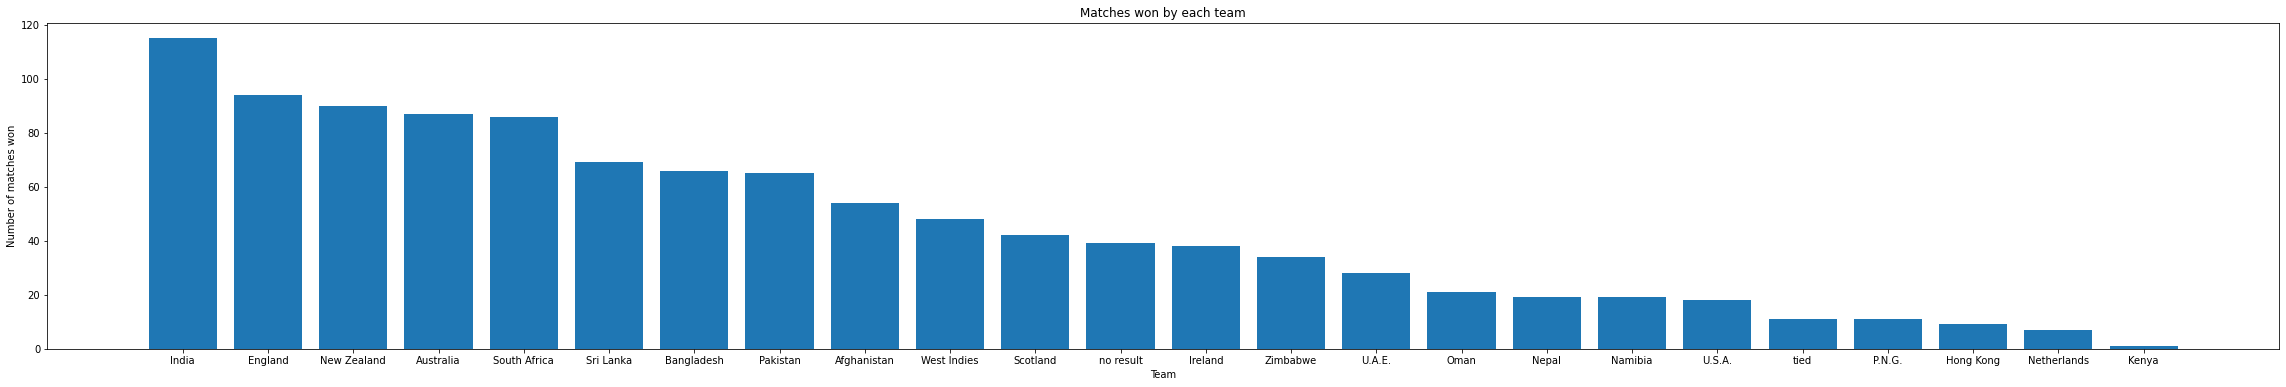

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/Cricket_Project_dataset1.csv')

# Count the number of matches won by each team
wins_by_team = df['Winner'].value_counts()

# Create a bar plot of matches won by each team
plt.figure(figsize=(40, 6))
plt.bar(wins_by_team.index, wins_by_team.values)
plt.title('Matches won by each team')
plt.xlabel('Team')
plt.ylabel('Number of matches won')
plt.show()

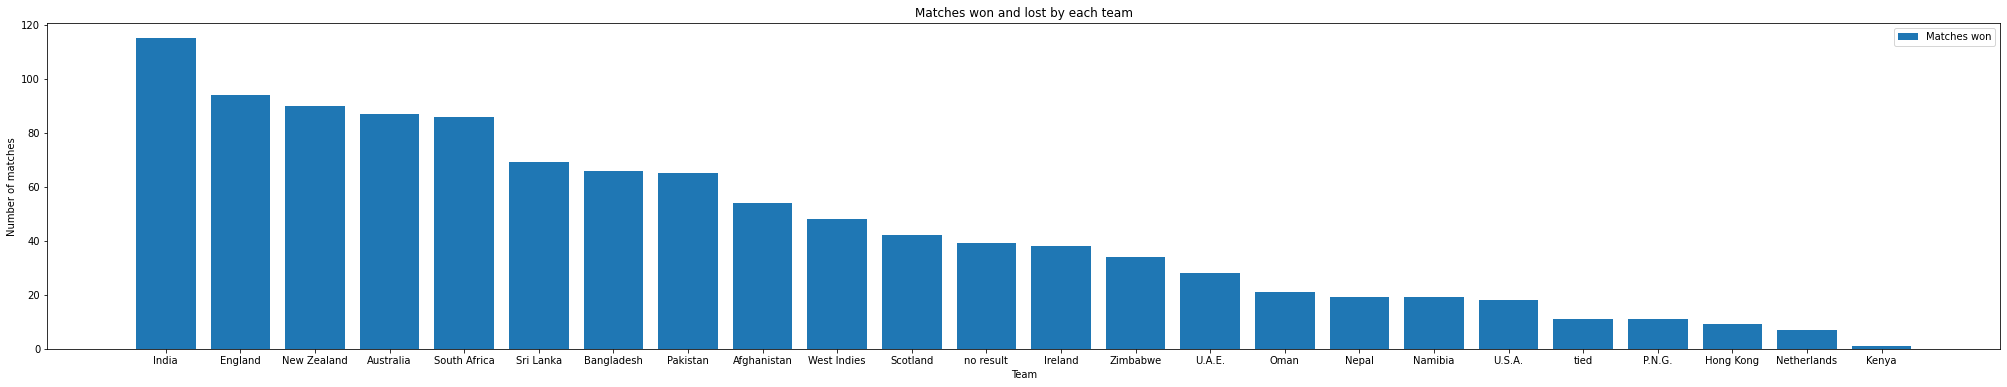

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/Cricket_Project_dataset1.csv')

# Count the number of matches won and lost by each team
matches_won = df['Winner'].value_counts()
matches_lost = (df['Team_1'] + df['Team_2'] - df['Winner'].value_counts()).dropna().astype(int)

# Create a stacked bar plot of matches won and lost by each team
plt.figure(figsize=(35, 6))
plt.bar(matches_won.index, matches_won.values, label='Matches won')
#plt.bar(matches_lost.index, matches_lost.values, bottom=matches_won.values, label='Matches lost')
plt.title('Matches won and lost by each team')
plt.xlabel('Team')
plt.ylabel('Number of matches')
plt.legend()
plt.show()

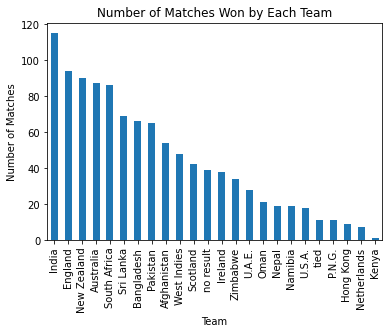

In [ ]:
# Create a bar chart of the number of matches won by each team
df['Winner'].value_counts().plot(kind='bar')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

**Feature engineering and selection:**

This is probably the most important part in the machine learning workflow. Since the algorithm is totally dependent on how we feed data into it, feature engineering should be given topmost priority for every machine learning project.
**Advantages of feature engineering**

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.


· Improves Accuracy: Less misleading data means modeling accuracy improves.


· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.


**So continuing with the work, I created the model. If team-1 won the match, I assigned it label 1, else if team-2 won, I assigned it label 2.**

In [ ]:
df_teams_2023 = df_teams_2023.reset_index(drop=True)
df_teams_2023.loc[df_teams_2023.Winner == df_teams_2023.Team_1,'winning_team']=1
df_teams_2023.loc[df_teams_2023.Winner == df_teams_2023.Team_2, 'winning_team']=2
df_teams_2023 = df_teams_2023.drop(['winning_team'], axis=1)

df_teams_2023.head()

,Team_1,Team_2,Winner
0,New Zealand,West Indies,New Zealand
1,New Zealand,West Indies,New Zealand
2,New Zealand,West Indies,West Indies
3,Australia,England,Australia
4,Australia,England,Australia


One Hot Encoding and Data Splitting

In [ ]:
final = pd.get_dummies(df_teams_2023, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

X = final.drop(['Winner'], axis=1)
y = final["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_Hong Kong,Team_1_India,Team_1_Ireland,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Ireland,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,New Zealand,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,New Zealand,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,West Indies,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Compare several machine learning models on a performance metric:**

I used Logistic Regression, Support Vector Machines, Random Forests and K Nearest Neighbours for training the model.

In [ ]:
rf = RandomForestClassifier( max_depth=20,random_state=50) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)) 
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.711
Test set accuracy:  0.637


In [ ]:
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)
score = knn.score(X_train, y_train)
score2 = knn.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)) 
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.677
Test set accuracy:  0.612


In [ ]:
lr = LogisticRegression(random_state= 50) 
lr.fit(X_train, y_train)
score = lr.score(X_train, y_train)
score2 = lr.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)) 
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.699
Test set accuracy:  0.696


In [ ]:
ranking = pd.read_csv('/content/icc_rankings1.csv') 
fixtures = pd.read_csv('/content/fixtures.csv')
pred_set = []

In [ ]:
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Team_1,Team_2,Group,Result
40,1,4.0,3.0,England,New Zealand,Group A,NaN
41,1,9.0,10.0,Afghanistan,West Indies,Group A,NaN
42,1,5.0,7.0,Pakistan,Bangladesh,Group A,NaN
43,1,8.0,1.0,Sri Lanka,India,Group A,NaN
44,1,2.0,6.0,Australia,South Africa,Group A,NaN


In [ ]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [ ]:

pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_Hong Kong,Team_1_India,Team_1_Ireland,Team_1_Netherlands,Team_1_New Zealand,Team_1_P.N.G.,...,Team_2_Ireland,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

In [ ]:
semi = [('New Zealand', 'India'),
            ('England', 'Australia')]

In [ ]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [ ]:
clean_and_predict(semi, ranking, final, rf)

New Zealand and India
Winner: India

England and Australia
Winner: Australia



In [ ]:
finals = [('India', 'England')]

In [ ]:
clean_and_predict(finals, ranking, final, rf)

England and India
Winner: India

